In [ ]:
#import the libraries

# importing pandas to work with data
import pandas as pd

# import matplotlib and seaborn for visulization
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly for customisable interective tools
import plotly.express as px

# import style from matplotlib to style the plots
from matplotlib import style
style.use('ggplot')

# import rf for matchng the specifoed set of string
import re

# import nltk for working with NLP and working with verious text liabraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# import word_tokenize for spliting the sentence into words using nltk
from nltk.tokenize import word_tokenize

# importing porterstemmer  for data mining and data retrival
from nltk.stem import PorterStemmer

# import WordNetLemmatizer for combining the words sevral inflected forms into single item
from nltk.stem import WordNetLemmatizer

# import stopwords for removing the most commenly  usde words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


# import WordCloud for visualizing  the text data
from wordcloud import WordCloud

# import TfidVectorizer to  Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# import preprocessing from sklearn for datapreprocessing
from sklearn.preprocessing import LabelEncoder

# import model_selection for spliting the arrays or matrices into random subsets for train and test data
from sklearn.model_selection import train_test_split

# import SVC classifier
from sklearn.svm import SVC


# import tokenize module to provides a lexical scanner for Python source code
from tensorflow.keras.preprocessing.text import Tokenizer

# import  pad_sequences for transforming the list of sequnce into the 2D array
from tensorflow.keras.preprocessing.sequence import pad_sequences

# import sequential from keras model to speify the API of the model
from tensorflow.keras.models import Sequential

# import veruous layers from the keras layers
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D

# import embedding form keras.layers
from tensorflow.keras.layers import Embedding

# import math module to work with mathemetical operations
import math

# importing linear models
from sklearn.linear_model import LinearRegression,LogisticRegression

# importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# import Linearsvc
from sklearn.svm import LinearSVC

# import metrics for various evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error,precision_score, recall_score, f1_score, accuracy_score,roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# read 'train.csv' file from the path
sentiment_df = pd.read_csv('/content/drive/MyDrive/Datasets/train_data.csv')
sentiment_df.head()



In [ ]:
# print the shape of the datframe
sentiment_df.shape

(1523975, 2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Text(0.5, 1.0, 'Sentiment distribution')

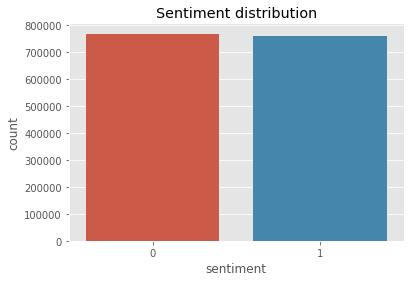

In [ ]:
# count plot for the sentiment assoisated with dataframe
sns.countplot(x='sentiment', data=sentiment_df)
plt.title("Sentiment distribution")

In [ ]:
# print dataframe info
print(sentiment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523975 entries, 0 to 1523974
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentence   1523975 non-null  object
 1   sentiment  1523975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ MB
None


In [ ]:
# print value counts
print(sentiment_df.sentiment.value_counts())

0    767059
1    756916
Name: sentiment, dtype: int64


In [ ]:
# iterate over the loop to print the first five sentence in the dataframe
for i in range(5):
    print("Sentence: ", [i])
    print(sentiment_df['sentence'].iloc[i], "\n")
    print("Sentiment: ", sentiment_df['sentiment'].iloc[i], "\n\n")

Sentence:  [0]
awww that s a bummer you shoulda got david carr of third day to do it d 

Sentiment:  0 


Sentence:  [1]
is upset that he can t update his facebook by texting it and might cry as a result school today also blah 

Sentiment:  0 


Sentence:  [2]
i dived many times for the ball managed to save the rest go out of bounds 

Sentiment:  0 


Sentence:  [3]
my whole body feels itchy and like its on fire 

Sentiment:  0 


Sentence:  [4]
no it s not behaving at all i m mad why am i here because i can t see you all over there 

Sentiment:  0 




In [ ]:
# Count the word from the input text and return the count of the words
def number_of_words(text):

  # split the word
  words= text.split()

  # count word
  word_count = len(words)

  return word_count

  # add word count column in dataframe
sentiment_df['Word count'] = sentiment_df['sentence'].apply(number_of_words)


In [ ]:
sentiment_df

,sentence,sentiment,Word count
0,awww that s a bummer you shoulda got david car...,0,17
1,is upset that he can t update his facebook by ...,0,22
2,i dived many times for the ball managed to sav...,0,16
3,my whole body feels itchy and like its on fire,0,10
4,no it s not behaving at all i m mad why am i h...,0,23
...,...,...,...
1523970,just woke up having no school is the best feel...,1,11
1523971,thewdb com very cool to hear old walt interviews,1,9
1523972,are you ready for your mojo makeover ask me fo...,1,11
1523973,happy th birthday to my boo of alll time tupac...,1,12


In [ ]:
# perform various preprocessing techiniques and return teh filtered text
def data_pre_processing(text):

  """
  This function takes a string as input and performs various preprocessing techniques,
  including case normalization, URL removal, symbol and punctuation removal,
  word tokenization, and stopword removal. It returns the filtered text.
  """


# Case normalization
    text= text.lower()  #Case Normalization

    # Remove URLs, symbols, and punctuation
    text = re.sub('', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Word tokenization
    text_tokens = word_tokenize(text)

    # Remove stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]

    # Return filtered text as a string
    return " ".join(filtered_text)

# Apply data_pre_processing function to 'sentence' column in sentiment_df DataFrame
sentiment_df.sentence = sentiment_df['sentence'].apply(data_pre_processing)

In [ ]:
# counting the number of duplicate values
duplicated_values = sentiment_df.duplicated().sum()
print("Number of duplicate reviews: ", duplicated_values)

Number of duplicate reviews:  20099


In [ ]:
# drop duplicate values from teh database
sentiment_df = sentiment_df.drop_duplicates('sentence')

In [ ]:
# dataframe after duplicate removing
sentiment_df.reset_index(drop=True)

,sentence,sentiment,Word count
0,awww bummer shoulda got david carr third day,0,17
1,upset update facebook texting might cry result...,0,22
2,dived many times ball managed save rest go bounds,0,16
3,whole body feels itchy like fire,0,10
4,behaving mad see,0,23
...,...,...,...
1474958,woke school best feeling ever,1,11
1474959,thewdb com cool hear old walt interviews,1,9
1474960,ready mojo makeover ask details,1,11
1474961,happy th birthday boo alll time tupac amaru sh...,1,12


In [ ]:
# Import WhitespaceTokenizer and WordNetLemmatizer from NLTK library
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize(data):

    """
    This function takes a string as input, tokenizes it using the WhitespaceTokenizer,
    lemmatizes each token using the WordNetLemmatizer, and returns the lemmatized string.
    """

  # Lemmatize each token and join with spaces
    filter_text = [lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(data)]

    return " ".join(filter_text)

In [ ]:
sentiment_df.sentence = sentiment_df['sentence'].apply(lemmatize)

In [ ]:
sentiment_df

,sentence,sentiment,Word count
0,awww bummer shoulda got david carr third day,0,17
1,upset update facebook texting might cry result...,0,22
2,dived many time ball managed save rest go bound,0,16
3,whole body feel itchy like fire,0,10
4,behaving mad see,0,23
...,...,...,...
1523970,woke school best feeling ever,1,11
1523971,thewdb com cool hear old walt interview,1,9
1523972,ready mojo makeover ask detail,1,11
1523973,happy th birthday boo alll time tupac amaru sh...,1,12


In [ ]:
#Load positive reviews
positive_rev =  sentiment_df[sentiment_df.sentiment == 1]
positive_rev.head()

,sentence,sentiment,Word count
767059,love u guy r best,1,7
767060,im meeting one besties tonight cant wait girl ...,1,13
767061,thanks twitter add sunisa got meet hin show dc...,1,26
767062,sick really cheap hurt much eat real food plus...,1,21
767063,effect everyone,1,6


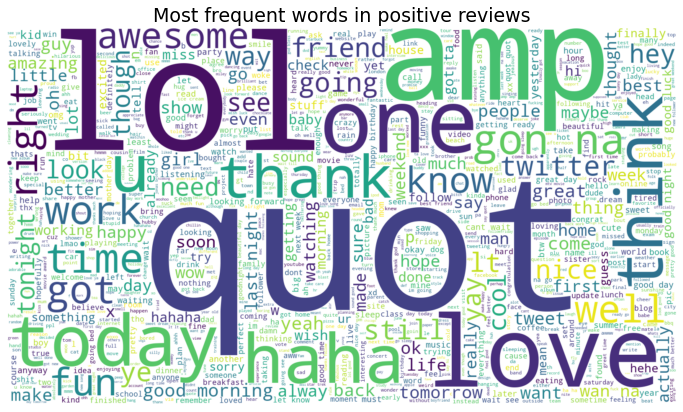

In [ ]:
# Concatenate all 'sentence' values from positive_rev DataFrame into a single string
text = ' '.join([word for word in positive_rev['sentence']])

# Create Matplotlib figure with specified size and no background color
plt.figure(figsize=(12,15), facecolor='None')

# Create word cloud object using 'text' string
wordcloud = WordCloud(max_words=1000, width=1600, height=900,background_color ='white').generate(text)

# Display word cloud using 'imshow' method
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axes from figure
plt.axis('off')

# Add title to figure
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [ ]:
# Import Counter class from collections module
from collections import Counter

# Initialize empty Counter object
count = Counter()

# Iterate through 'sentence' column in positive_rev DataFrame
for text in positive_rev['sentence'].values:

  # Split text string into individual words and iterate through them
    for word in text.split():
      # Increment count for each word
        count[word] +=1

# Print 15 most common words
count.most_common(15)

[('good', 56583),
 ('day', 52442),
 ('love', 47989),
 ('quot', 45139),
 ('u', 39119),
 ('like', 37164),
 ('get', 36250),
 ('lol', 35051),
 ('time', 33264),
 ('got', 31161),
 ('going', 29888),
 ('go', 29670),
 ('today', 29416),
 ('thanks', 28410),
 ('one', 27562)]

In [ ]:
# Create DataFrame of 15 most common words in 'count' object
def_positive_words = pd.DataFrame(count.most_common(15))

# Rename columns of DataFrame
def_positive_words.columns = ['Positive_word', 'count']

# Print first few rows of DataFrame
def_positive_words.head()

,Positive_word,count
0,good,56583
1,day,52442
2,love,47989
3,quot,45139
4,u,39119


In [ ]:

#Load Negative reviews
negative_rev =  sentiment_df[sentiment_df.sentiment == 0]
negative_rev.head()

,sentence,sentiment,Word count
0,awww bummer shoulda got david carr third day,0,17
1,upset update facebook texting might cry result...,0,22
2,dived many time ball managed save rest go bound,0,16
3,whole body feel itchy like fire,0,10
4,behaving mad see,0,23


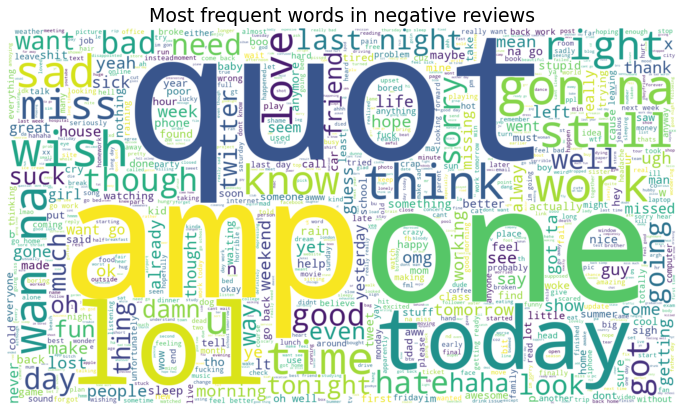

In [ ]:
# Concatenate all 'sentence' values from negative_rev DataFrame into a single string
text = ' '.join([word for word in negative_rev['sentence']])

# Create Matplotlib figure with specified size and no background color
plt.figure(figsize=(12,15), facecolor='None')

# Create word cloud object using 'text' string
wordcloud = WordCloud(max_words=1000, width=1600, height=900,background_color ='white').generate(text)

# Display word cloud using 'imshow' method
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axes from figure
plt.axis('off')

# Add title to figure
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [ ]:

# Import Counter class from collections module
from collections import Counter

# Initialize empty Counter object
count = Counter()

# Iterate through 'sentence' column in negative_rev DataFrame
for text in negative_rev['sentence'].values:

  # Split text string into individual words and iterate through them
    for word in text.split():

      # Increment count for each word
        count[word] +=1

        # Print 15 most common words
count.most_common(15)

[('day', 50799),
 ('get', 47450),
 ('go', 46583),
 ('work', 43485),
 ('like', 40943),
 ('got', 38055),
 ('today', 37433),
 ('going', 32932),
 ('want', 32521),
 ('back', 32130),
 ('time', 30996),
 ('really', 30529),
 ('im', 30163),
 ('u', 30097),
 ('miss', 29772)]

In [ ]:
def_negative_words = pd.DataFrame(count.most_common(15))
def_negative_words.columns = ['Negative_word', 'count']
def_negative_words.head()

,Negative_word,count
0,day,50799
1,get,47450
2,go,46583
3,work,43485
4,like,40943


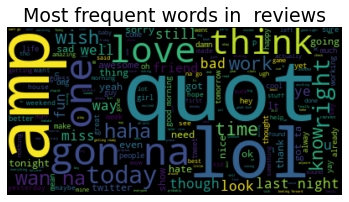

In [ ]:
# Initialize empty string to store concatenated words
common_words=''


# Iterate through 'sentence' column in sentiment_df DataFrame
for i in sentiment_df.sentence:

  # Convert value to string and split into individual words
    i = str(i)
    tokens = i.split()

    # Concatenate words with spaces in between and add to 'common_words' string
    common_words += " ".join(tokens)+" "

    # Create word cloud object using 'common_words' string
wordcloud = WordCloud().generate(common_words)

# Display word cloud using 'imshow' method
plt.imshow(wordcloud, interpolation='bilinear')

# Remove axes from figure
plt.axis('off')

# Add title to figure
plt.title('Most frequent words in  reviews', fontsize = 19)

# Display figure
plt.show()

In [ ]:
for text in sentiment_df['sentence'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('day', 154040),
 ('get', 131150),
 ('go', 122836),
 ('like', 119050),
 ('good', 111993),
 ('work', 107883),
 ('got', 107271),
 ('today', 104282),
 ('u', 99313),
 ('quot', 96591),
 ('going', 95752),
 ('time', 95256),
 ('back', 87231),
 ('one', 84782),
 ('love', 82771)]

In [ ]:
def_common_words = pd.DataFrame(count.most_common(15))
def_common_words.columns = ['Common_word', 'count']
def_common_words.head()

,Common_word,count
0,day,154040
1,get,131150
2,go,122836
3,like,119050
4,good,111993


In [ ]:
def make_encode_vector():

  """
  This function creates and returns training and testing datasets
  for use in a machine learning model.
  """

  # Store 'sentence' and 'sentiment' columns in separate variables
  X = sentiment_df['sentence']
  Y = sentiment_df['sentiment']

  # Create TfidfVectorizer object
  vector = TfidfVectorizer()

  # Create LabelEncoder object
  le = LabelEncoder()

  # Transform 'sentence' column using TfidfVectorizer and store result in 'X'
  X = vector.fit_transform(sentiment_df['sentence'])

  # Encode 'sentiment' column and store result in 'Y'
  Y = le.fit_transform(sentiment_df['sentiment'].values)

  # Split data into training and testing datasets
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

  # Return training and testing datasets
  return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test= make_encode_vector()

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (1032474, 254245)
Size of y_train:  (1032474,)
Size of x_test:  (442489, 254245)
Size of y_test:  (442489,)


Accuracy: 77.38%
Precision:76.16%
Recall:79.00%
F1 Score:77.55%


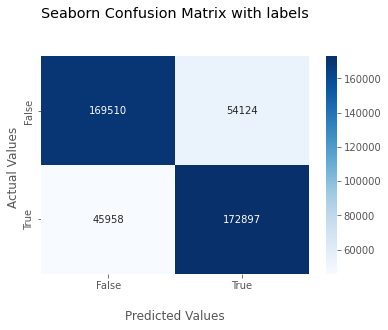

In [ ]:
#Logistic regression
def logistic_reg_model(x_train, x_test, y_train, y_test):

  # Create a logistic regression mode
  logistic_reg = LogisticRegression()

  # Train the model on the training data
  log_reg_model = logistic_reg.fit(x_train, y_train)

  # Make predictions on the test data
  logistic_pred = logistic_reg.predict(x_test)

  # Calculate the model's accuracy
  logistic_acc = accuracy_score(y_test, logistic_pred)

  logistic_pre = precision_score(y_test, logistic_pred)
  logistic_recall = recall_score(y_test, logistic_pred)
  logistic_f1 = f1_score(y_test, logistic_pred)
  print("Accuracy: {:.2f}%".format(logistic_acc*100))
  print("Precision:{:.2f}%" .format(logistic_pre*100))
  print("Recall:{:.2f}%" .format(logistic_recall*100))
  print("F1 Score:{:.2f}%" .format(logistic_f1*100))
  cm = confusion_matrix(y_test, logistic_pred)
  rm=sns.heatmap(cm, annot=True,cmap='Blues',fmt='d')
  rm.set_title('Seaborn Confusion Matrix with labels\n\n');
  rm.set_xlabel('\nPredicted Values')
  rm.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  rm.xaxis.set_ticklabels(['False','True'])
  rm.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
  return log_reg_model,logistic_pred,logistic_acc,y_test
log_reg_model,logistic_pred,logistic_acc,y_test = logistic_reg_model(x_train, x_test, y_train, y_test)

Accuracy: 75.57%
Precision:76.09%
Recall:73.80%
F1 Score:74.93%


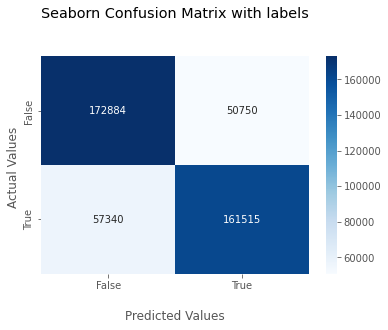

In [ ]:
# Model Generation Using Multinomial Naive Bayes
def naive_bayes_model(x_train, x_test, y_train, y_test):

  # Create a Multinomial Naive Bayes model
  mnb_model=MultinomialNB()

  # Train the model on the training data
  mnb_model.fit(x_train, y_train)

  # Make predictions on the test data
  mnb_model_pred = mnb_model.predict(x_test)

  # Calculate the model's accuracy
  mnb_model_acc = accuracy_score(y_test,mnb_model_pred)

  mnb_model_pre = precision_score(y_test, mnb_model_pred)
  mnb_model_recall = recall_score(y_test, mnb_model_pred)
  mnb_model_f1 = f1_score(y_test, mnb_model_pred)
  print("Accuracy: {:.2f}%".format(mnb_model_acc*100))
  print("Precision:{:.2f}%" .format(mnb_model_pre*100))
  print("Recall:{:.2f}%" .format(mnb_model_recall*100))
  print("F1 Score:{:.2f}%" .format(mnb_model_f1*100))
  cmn = confusion_matrix(y_test, mnb_model_pred)
  rm=sns.heatmap(cmn, annot=True,cmap='Blues',fmt='d')
  rm.set_title('Seaborn Confusion Matrix with labels\n\n');
  rm.set_xlabel('\nPredicted Values')
  rm.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  rm.xaxis.set_ticklabels(['False','True'])
  rm.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()
  return mnb_model,mnb_model_pred,mnb_model_acc
mnb_model,mnb_model_pred,mnb_model_acc = naive_bayes_model(x_train, x_test, y_train, y_test)

Accuracy: 76.68%
Precision:75.54%
Recall:78.18%
F1 Score:76.83%


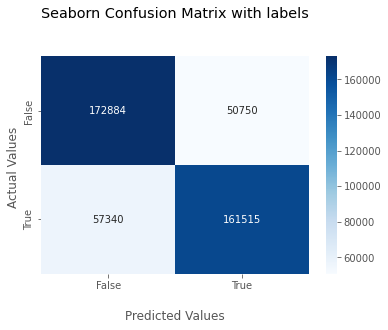

In [ ]:
def svm_model(x_train, x_test, y_train, y_test):

  # Create an SVM model
  svc_model= LinearSVC()

  # Train the model on the training data
  svc_model.fit(x_train, y_train)

  # Make predictions on the test data
  svc_model_pred = svc_model.predict(x_test)

  # Calculate the model's accuracy
  svc_model_acc = accuracy_score(y_test,svc_model_pred)
  svc_model_pre = precision_score(y_test, svc_model_pred)
  svc_model_recall = recall_score(y_test, svc_model_pred)
  svc_model_f1 = f1_score(y_test, svc_model_pred)
  print("Accuracy: {:.2f}%".format(svc_model_acc*100))
  print("Precision:{:.2f}%" .format(svc_model_pre*100))
  print("Recall:{:.2f}%" .format(svc_model_recall*100))
  print("F1 Score:{:.2f}%" .format(svc_model_f1*100))
  cms = confusion_matrix(y_test, mnb_model_pred)
  rm=sns.heatmap(cms, annot=True,cmap='Blues',fmt='d')
  rm.set_title('Seaborn Confusion Matrix with labels\n\n');
  rm.set_xlabel('\nPredicted Values')
  rm.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  rm.xaxis.set_ticklabels(['False','True'])
  rm.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

  return svc_model,svc_model_pred,svc_model_acc
svc_model,svc_model_pred,svc_model_acc = svm_model(x_train, x_test, y_train, y_test)

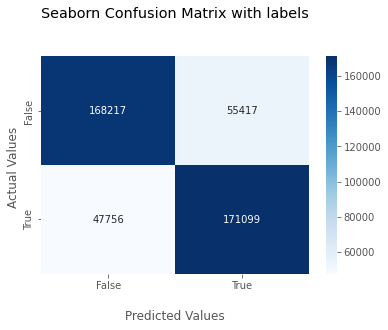

In [ ]:
def confusion_matrices():

  # cm = confusion_matrix(y_test, logistic_pred)  #LogisticPredection
  # cm = confusion_matrix(y_test, mnb_model_pred)   #MultinomialNB
  cm = confusion_matrix(y_test, svc_model_pred)   #SVM
  rm=sns.heatmap(cm, annot=True,cmap='Blues',fmt='d')
  rm.set_title('Seaborn Confusion Matrix with labels\n\n');
  rm.set_xlabel('\nPredicted Values');
  rm.set_ylabel('Actual Values ');
  ## Ticket labels - List must be in alphabetical orderd
  rm.xaxis.set_ticklabels(['False','True'])
  rm.yaxis.set_ticklabels(['False','True'])
  ## Display the visualization of the Confusion Matrix.
  plt.show()

confusion_matrices()

In [ ]:
# Create a Tokenizer object with a vocabulary size of 20 million words
tokenizer = Tokenizer(num_words=20000000, split=' ')

# Fit the tokenizer on the input text
tokenizer.fit_on_texts(sentiment_df['sentence'].values)

# Convert the input text to a sequence of integers
X = tokenizer.texts_to_sequences(sentiment_df['sentence'].values)

# Pad the sequences to the same length
X = pad_sequences(X)

# Print the padded sequences
print(X)

[[    0     0     0 ...  8463  1692     1]
 [    0     0     0 ...     9   170   969]
 [    0     0     0 ...   352     5  2850]
 ...
 [    0     0     0 ...  6769   500  1667]
 [    0     0     0 ... 10946 64564 45290]
 [    0     0     0 ...     0    56 15861]]


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

# Compile the model with specified loss function, optimizer, and metrics
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

# Print a summary of the model's architecture
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 120)           60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 120)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(sentiment_df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
# Train the model on the training data
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
32265/32265 [==============================] - 5454s 169ms/step - loss: 0.5425 - accuracy: 0.7157
Epoch 2/5
32265/32265 [==============================] - 5354s 166ms/step - loss: 0.5324 - accuracy: 0.7235
Epoch 3/5
32265/32265 [==============================] - 5253s 163ms/step - loss: 0.5287 - accuracy: 0.7267
Epoch 4/5
22119/32265 [===================>..........] - ETA: 27:23 - loss: 0.5266 - accuracy: 0.7284

In [ ]:
 # Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)